In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 첫번째 두번째

In [9]:
df_sale = pd.read_csv("../data/new_sales4.csv", encoding="euc-kr")
tee1 = df_sale.groupby("고객번호")["물품대분류"].apply(list).apply(lambda x: x[0]).reset_index()
tee1

,고객번호,물품대분류
0,201812310749735,수유용품
1,201812310749770,티슈
2,201812310749771,3단계
3,201812310749774,3단계
4,201812310749780,이벤트
...,...,...
81050,201912281058004,이벤트
81051,201912281058006,이벤트
81052,201912281058007,아이_생활용품
81053,201912281058011,이벤트


In [10]:
df_tmp = df_sale.groupby('고객번호')['주문번호'].apply(list).apply(lambda x:x[:2]).reset_index()
df_tmp2 = df_tmp[df_tmp['주문번호'].apply(len) > 1]
df_tmp2

,고객번호,주문번호
0,201812310749735,"[201905052342970, 202002203424450]"
3,201812310749774,"[201905092356247, 201907282649358]"
5,201812310749783,"[201901161908099, 201906302542644]"
6,201812310749784,"[201904292316940, 201906242522007]"
7,201812310749787,"[201812311861810, 201901201920825]"
...,...,...
81045,201912281057984,"[202002223431991, 202002223431991]"
81047,201912281057991,"[202001153300382, 202004053627524]"
81048,201912281057997,"[20200706205941-05897002163, 20200706205941-05..."
81051,201912281058006,"[201912283245106, 20200521172454-86563196093]"


In [12]:
tmp1 = df_tmp2['주문번호'].apply(lambda x:x[0][:8])
tmp2 = df_tmp2['주문번호'].apply(lambda x:x[1][:8])
(tmp2.astype('datetime64') - tmp1.astype('datetime64')).dt.days

0        291
3         80
5        165
6         56
7         20
        ... 
81045      0
81047     81
81048      0
81051    145
81054    184
Name: 주문번호, Length: 36231, dtype: int64

In [13]:
# 첫구매 후 90일 이내 재 구매한 사람과 첫구매 물품
tee1.loc[(tmp2.astype('datetime64') - tmp1.astype('datetime64')).dt.days]

,고객번호,물품대분류
291,201901010750549,생리대
80,201812310750006,수유용품
165,201901010750228,수유용품
56,201812310749934,수유용품
20,201812310749833,5단계
...,...,...
0,201812310749735,수유용품
81,201812310750007,4단계
0,201812310749735,수유용품
145,201901010750177,1단계


In [20]:
# 두번째 구매까지 걸린 시간
tmp3 = (tmp2.astype('datetime64') - tmp1.astype('datetime64')).dt.days
tmp4 = tee1.loc[tmp3.index]
tmp4['두번째구매까지기간'] = tmp3
tmp4

,고객번호,물품대분류,두번째구매까지기간
0,201812310749735,수유용품,291
3,201812310749774,3단계,80
5,201812310749783,생리대,165
6,201812310749784,이벤트,56
7,201812310749787,2단계,20
...,...,...,...
81045,201912281057984,아이_생활용품,0
81047,201912281057991,이벤트,81
81048,201912281057997,2단계,0
81051,201912281058006,이벤트,145


In [23]:
tmp4[tmp4['두번째구매까지기간'] <= 90]['물품대분류'].value_counts() / tee1['물품대분류'].value_counts()


1단계        0.414589
2단계        0.445349
3단계        0.413208
4단계        0.340374
5단계        0.317413
6단계        0.304778
7단계        0.352941
기타         0.333333
마스크        0.298654
생리대        0.372622
수유용품       0.399283
아이_생활용품    0.397653
어른_생활용품    0.405765
음식         0.182927
이벤트        0.241180
장난감        0.388693
주방용품       0.310380
청결용품       0.354651
티슈         0.277135
화장품        0.333171
Name: 물품대분류, dtype: float64

In [16]:
tmp4.to_csv('../data/두번째까지기간.csv', encoding='euc-kr', index=False)
tmp4[tmp4['두번째구매까지기간'] <= 90]['물품대분류'].value_counts() / tee1['물품대분류'].value_counts()
tee1['물품대분류'].value_counts()

이벤트        21287
수유용품       11160
티슈          8909
2단계         6386
3단계         6360
생리대         4310
주방용품        3921
4단계         3314
청결용품        2408
아이_생활용품     2301
1단계         2166
화장품         2050
5단계         2010
마스크         1932
어른_생활용품     1353
6단계          607
장난감          283
음식           246
7단계           34
기타            18
Name: 물품대분류, dtype: int64

# 이탈율

In [204]:
member_df = pd.read_csv('../data/Member_data4.csv', encoding='euc-kr')
member_df['가입일'] = pd.to_datetime(member_df['가입일'].apply(lambda x: f'{str(x)[:4]}-{str(x)[4:6]}-{str(x)[6:8]}'))

sale_df = pd.read_csv('../data/new_sales4.csv', encoding='euc-kr')
sale_df['구매일'] = pd.to_datetime(sale_df['구매일'])

merged = pd.merge(sale_df, member_df[['고객번호', '가입일']], on='고객번호', how='left')
merged['구매년'] = merged['구매일'].dt.year
merged['구매월'] = merged['구매일'].dt.month

event_start = pd.to_datetime('2019-01-29')
event_end = pd.to_datetime('2019-02-01')
event = merged[(merged['가입일'] >= event_start) & (merged['가입일'] <= event_end)]
# event_cust_num = event['고객번호'].nunique()
# print(f'이벤트 신규 유입 고객: {event_cust_num}\n')
event_grouped = event.groupby(['구매년', '구매월'], as_index=False)['구매금액'].sum()
event_grouped['날짜'] = event_grouped.apply(lambda x: pd.to_datetime(f"{x['구매년']}-{x['구매월']:02}"), axis=1)


not_event = merged[(merged['가입일'] < event_start)]
not_event = not_event[not_event['구매일'] >= event_start].reset_index(drop=True)

# not_event_cust_num = not_event["고객번호"].nunique()
# not_event_cust_list = np.random.choice(not_event_cust_num, event_cust_num, replace=False)
# not_event_cust_list = not_event['고객번호'].unique()[not_event_cust_list]
# def is_cust(x):
#     for not_cust in not_event_cust_list:
#         if x == not_cust:
#             return True
#     return False

# not_event = not_event[not_event['고객번호'].apply(lambda x: is_cust(x))]
# print(not_event["고객번호"].nunique())
not_event_grouped = not_event.groupby(['구매년', '구매월'], as_index=False)['구매금액'].sum()
not_event_grouped['날짜'] = not_event_grouped.apply(lambda x: pd.to_datetime(f"{x['구매년']}-{x['구매월']:02}"), axis=1)

# event.shape, not_event.shape

In [205]:
print('\n이벤트 신규 유입 고객')
display(event)
print('\n기존 고객')
display(not_event)

print('\n이벤트 신규 유입 고객 shape')
display(event.shape)
print('\n기존 고객 shape')
display(not_event.shape)

print('\n이벤트 신규 유입 고객 물품대분류 카운트')
display(event['물품대분류'].value_counts(sort=True))
print('\n기존 고객 물품대분류 카운트')
display(not_event['물품대분류'].value_counts(sort=True))


이벤트 신규 유입 고객


,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율,가입일,구매년
29976,201902132025623,2019-02-14,2019-02-15,2019-02-18,7.0,201901290778210,6040,3861,이벤트,하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩),1.000000,2,0.36,2019-01-29,2019
29977,201903312215499,2019-03-31,2019-04-01,2019-04-04,8.0,201901290778210,7280,5841,이벤트,하기스 매직핏팬티 4단계 여아 20매(팬티형/체험팩),1.233898,3,0.20,2019-01-29,2019
29978,201904062245157,2019-04-06,2019-04-07,2019-04-09,58.0,201901290778211,16700,12780,티슈,크리넥스 순수 3겹 소프트 27m-30롤,1.000000,4,0.23,2019-01-29,2019
29979,201904232307866,2019-04-23,2019-04-24,2019-04-27,-8.0,201901290778212,13000,9652,화장품,그린핑거 촉촉 선팩트 리필 16g,1.250000,4,0.26,2019-01-29,2019
29980,201907282648108,2019-07-28,2019-07-29,2019-07-31,3.0,201901290778215,19900,14176,티슈,크리넥스 3겹 울트라클린 27m 30롤,1.000000,7,0.29,2019-01-29,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40111,201903192171369,2019-03-19,2019-03-20,2019-03-22,NaN,201902010786592,19100,13454,티슈,크리넥스 데코앤소프트 클래식 27-30롤,1.000000,3,0.30,2019-02-01,2019
40112,201902122018701,2019-02-12,2019-02-13,2019-02-16,33.0,201902010786594,2500,2475,생리대,좋은느낌 솜솜 수퍼롱 오버나이트 8개입,1.000000,2,0.01,2019-02-01,2019
40113,201912183191320,2019-12-18,2019-12-19,2019-12-21,NaN,201902010786595,4180,3622,티슈,크리넥스 여행용티슈 카카오프렌즈 70매 X 3개입,2.090000,12,0.13,2019-02-01,2019
40114,201903212178437,2019-03-21,2019-03-22,2019-03-25,NaN,201902010786599,16700,12028,티슈,크리넥스 순수 3겹 소프트 27m-30롤,1.000000,3,0.28,2019-02-01,2019



기존 고객


,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율,가입일,구매년
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,5,0.37,2018-12-31,2019
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,2,0.26,2018-12-31,2020
2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,티슈,크리넥스？키즈용？화장지？3겹？27m 8롤,1.000000,2,0.32,2018-12-31,2019
3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,3단계,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,5,0.19,2018-12-31,2019
4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,5,0.21,2018-12-31,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26304,201902122021217,2019-02-13,2019-02-14,2019-02-16,NaN,201901280778206,3600,2445,주방용품,크리넥스 안심 클래식 키친타올 120매 X 4롤,1.000000,2,0.32,2019-01-28,2019
26305,201902252078662,2019-02-25,2019-02-26,2019-02-28,NaN,201901280778206,38000,33856,생리대,라네이처 울트라 날개 오버나이트 14개입,4.000000,2,0.11,2019-01-28,2019
26306,201904282313716,2019-04-28,2019-04-29,2019-05-01,NaN,201901280778206,16700,12028,티슈,크리넥스 순수 3겹 소프트 27m-30롤,1.000000,4,0.28,2019-01-28,2019
26307,202003023476967,2020-03-03,2020-03-04,2020-03-07,NaN,201901280778206,19900,19900,티슈,릴리유 퓨어핑크 아기물티슈 캡형 72매X20팩,1.000000,3,0.00,2019-01-28,2020



이벤트 신규 유입 고객 shape


(10140, 15)


기존 고객 shape


(26309, 15)


이벤트 신규 유입 고객 물품대분류 카운트


수유용품       2139
티슈         1520
이벤트        1177
생리대        1020
주방용품        611
4단계         503
3단계         494
청결용품        471
마스크         436
아이_생활용품     362
화장품         339
5단계         287
2단계         241
어른_생활용품     208
1단계          92
장난감          89
음식           71
6단계          64
기타            9
7단계           7
Name: 물품대분류, dtype: int64


기존 고객 물품대분류 카운트


이벤트        3448
수유용품       3370
티슈         2982
4단계        2289
3단계        2250
생리대        1847
주방용품       1400
청결용품       1373
5단계        1312
아이_생활용품    1217
2단계        1101
마스크        1043
화장품         994
어른_생활용품     588
6단계         312
1단계         309
장난감         282
음식          162
7단계          20
기타           10
Name: 물품대분류, dtype: int64

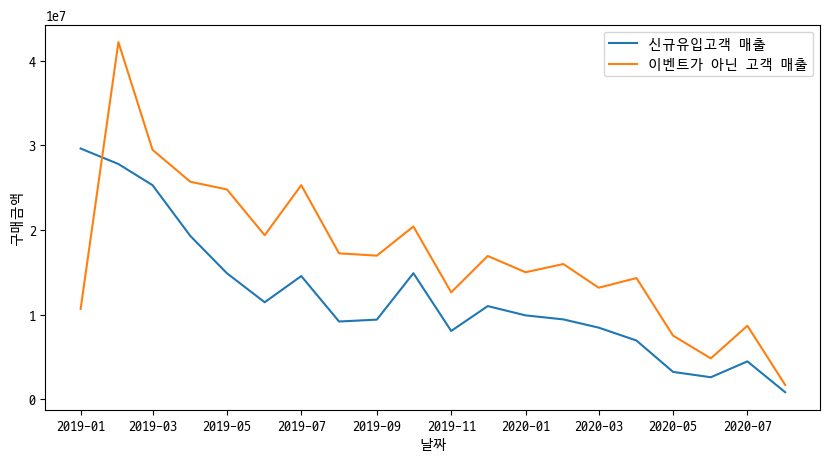

In [198]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=event_grouped, x='날짜', y='구매금액', label='신규유입고객 매출')
sns.lineplot(data=not_event_grouped, x='날짜', y='구매금액', label='이벤트가 아닌 고객 매출')

# plt.xticks(rotation=30)
plt.legend()
plt.show()